### Importing libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import accuracy_score as ac
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report




/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Importing Dataset 

In [ ]:
eeg_df=pd.read_csv('/content/drive/MyDrive/Graduation_data/Graduation_01.csv')

In [ ]:
eeg_df.head()

,EEG _mean(),EEG _std(),EEG _mad(),EEG _max(),EEG _min(),EEG _energy(),EEG _iqr(),EEG _entropy(),EEG _mean().1,EEG _std().1,EEG _mad().1,EEG _max().1,EEG _min().1,EEG _energy().1,EEG _iqr().1,EEG _entropy().1,EEG _skewness(),EEG _kurtosis(),EEG _mean().2,EEG _std().2,EEG _mad().2,EEG _max().2,EEG _min().2,EEG _iqr().2,EEG _entropy().2,EEG _skewness().1,EEG _kurtosis().1,state,subject
0,52.430,258.690733,330.620295,556,-587,13933960,438.00,5.075521,2165.547123,3040.454844,868.221405,21313.663472,89.408300,13933960.0,2428.431654,4.705440,[3.87146543],[18.90574346],37.533228,261.268170,253.702656,657.609307,-781.352993,268.700577,4.978994,[0.23563205],[0.25675342],0,0
1,61.125,552.757053,661.981891,950,-982,61855325,940.00,5.118838,3342.727579,7119.093856,856.831442,49845.736802,290.723430,61855325.0,2774.168882,4.351935,[5.08980018],[28.0742021],45.028560,554.300509,495.873373,1155.412480,-1288.348555,654.604103,5.004412,[-0.09053293],[-0.24383106],1,1
2,42.820,254.083781,303.192154,451,-475,13278424,468.50,5.150551,1821.133173,3156.247450,800.006376,27396.273863,92.439887,13278424.0,1641.445938,4.605368,[5.78996593],[41.47527757],26.778134,256.271441,229.590420,607.404725,-531.744299,312.364421,4.990480,[0.04465197],[-0.45158065],0,2
3,36.405,55.646572,58.562788,212,-135,884373,76.25,5.015599,537.079691,771.957515,254.075703,7281.000000,40.169842,884373.0,502.879029,4.722169,[4.80902724],[32.57728753],24.932585,61.646015,31.974922,275.771645,-140.007143,67.528698,4.749479,[0.76360157],[1.45863391],1,3
4,39.090,328.835281,372.874458,504,-643,21932134,595.00,5.168024,1841.607707,4305.881449,448.692898,29784.745076,59.488466,21932134.0,1464.972775,4.191696,[5.0585361],[27.68921778],26.530646,330.086042,322.370110,685.186471,-831.557575,428.329933,4.965934,[-0.25973714],[-0.30126909],0,4


In [ ]:
eeg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EEG _mean()        9742 non-null   float64
 1   EEG _std()         9742 non-null   float64
 2   EEG _mad()         9742 non-null   float64
 3   EEG _max()         9742 non-null   int64  
 4   EEG _min()         9742 non-null   int64  
 5   EEG _energy()      9742 non-null   int64  
 6   EEG _iqr()         9742 non-null   float64
 7   EEG _entropy()     9742 non-null   float64
 8   EEG _mean().1      9742 non-null   float64
 9   EEG _std().1       9742 non-null   float64
 10  EEG _mad().1       9742 non-null   float64
 11  EEG _max().1       9742 non-null   float64
 12  EEG _min().1       9742 non-null   float64
 13  EEG _energy().1    9742 non-null   float64
 14  EEG _iqr().1       9742 non-null   float64
 15  EEG _entropy().1   9742 non-null   float64
 16  EEG _skewness()    9742 

In [ ]:
eeg_df.drop(columns=['EEG _skewness()','EEG _kurtosis()','EEG _skewness().1','EEG _kurtosis().1'],inplace=True)

In [ ]:
X = eeg_df.iloc[:, :-2].values  #Selecting all features excluding the target col (intrested or not).
y = eeg_df.iloc[:, -2].values   #Selecting only the target col the state (intrested or not).

In [ ]:
print(X.shape)  #printing the shape of the training data.
print(y.shape)  #printing the shape of the target.


(9742, 23)
(9742,)


In [ ]:
#spliting the data into training set and testing set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 1
)

In [ ]:
print(X_train.shape)
print(y_train)

(7793, 23)
[0 1 1 ... 0 0 0]


### Feature scaling


In [ ]:
#Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.00484534, -0.73068842, -0.63411084, ...,  0.63462497,
        -0.67801866,  0.510688  ],
       [-0.15157196,  1.05265652,  1.3270857 , ..., -0.90945281,
         1.16883171,  0.50003831],
       [-0.93236894, -1.45556328, -1.51645663, ...,  1.28567918,
        -1.55567152, -1.22148939],
       ...,
       [-0.1001206 , -0.06275198,  0.19429241, ...,  0.17157571,
        -0.12707103,  0.56428293],
       [-0.0600169 , -0.53400545, -0.54163792, ...,  0.45358315,
        -0.53440274,  0.61225546],
       [ 0.23179872, -0.18491952, -0.21027662, ...,  0.14894549,
        -0.2018185 ,  0.33766012]])

In [ ]:
X_test

array([[ 0.06996549,  1.59449855,  1.09975643, ..., -1.69976995,
         1.85415681,  0.49776611],
       [ 0.24533855,  0.58884032,  0.45629902, ..., -0.51429423,
         0.73042521,  0.43130335],
       [-0.2077945 , -1.56688975, -1.61663562, ...,  1.48586965,
        -1.4305325 , -0.95832127],
       ...,
       [-0.33481102,  2.44198618,  1.8896293 , ..., -2.43960429,
         2.64446431,  0.34772807],
       [ 0.13818045,  0.61098878,  0.53721283, ..., -0.47251535,
         0.72622591,  0.39695411],
       [-0.61411841,  1.84134401,  1.85109892, ..., -2.02703785,
         1.52997116,  0.10173068]])

In [ ]:
X_train.shape

(7793, 23)

In [ ]:
lda=LDA(solver='svd')
svmc= SVC(kernel = 'rbf', random_state = None)
knn = KNN(n_neighbors = 50, metric = 'minkowski', p = 2,n_jobs=-1)
rf = RFC(n_estimators = 50, criterion = 'entropy', random_state = 0,n_jobs=-1)

In [ ]:
from timeit import default_timer as timer
start_time=timer()

In [ ]:
# Build full model with selected features

lda.fit(X_train, y_train)
y_test_pred = lda.predict(X_test)
print('Testing accuracy on selected features: %.3f' % ac(y_test, y_test_pred))

Testing accuracy on selected features: 0.963


In [ ]:
# Build full model with selected features

svmc.fit(X_train, y_train)
y_test_pred_1 = svmc.predict(X_test)
print('Testing accuracy on selected features: %.3f' % ac(y_test, y_test_pred_1))

Testing accuracy on selected features: 0.998


In [ ]:
# Build full model with selected features

knn.fit(X_train, y_train)
y_test_pred_2 = knn.predict(X_test)
print('Testing accuracy on selected features: %.3f' % ac(y_test, y_test_pred_2))

Testing accuracy on selected features: 0.976


In [ ]:
# Build full model with selected features

rf.fit(X_train, y_train)
y_test_pred_3 = knn.predict(X_test)
print('Testing accuracy on selected features: %.3f' % ac(y_test, y_test_pred_3))

Testing accuracy on selected features: 0.976


In [ ]:
end_time=timer()
print ('Full Duration in seconds :', end_time-start_time)

Full Duration in seconds : 23.863738427000044


### LinearDiscriminantAnalysis

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    #specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, accuracy

In [ ]:
sensitivity_lda,accuracy_lda = calculate_sensitivity_specificity(y_test, y_test_pred)
print ('Sensitivity for LDA is:', sensitivity_lda)
print ('Accuracy for LDA is ', accuracy_lda)
print('*-------------------------------------------------------*')
sensitivity_svm,accuracy_svm = calculate_sensitivity_specificity(y_test, y_test_pred_1)
print ('Sensitivity for svm is:', sensitivity_svm)
print ('Accuracy for svm is ', accuracy_svm)
print('*-------------------------------------------------------*')
sensitivity_knn,accuracy_knn = calculate_sensitivity_specificity(y_test, y_test_pred_2)
print ('Sensitivity for KNN is:', sensitivity_knn)
print ('Accuracy for KNN is ', accuracy_knn)
print('*-------------------------------------------------------*')
sensitivity_rf,accuracy_rf = calculate_sensitivity_specificity(y_test, y_test_pred_3)
print ('Sensitivity for rf is:', sensitivity_rf)
print ('Accuracy for rf is ', accuracy_rf)
print('*-------------------------------------------------------*')

Sensitivity for LDA is: 0.9312977099236641
Accuracy for LDA is  0.9630579784504875
*-------------------------------------------------------*
Sensitivity for svm is: 0.9961832061068703
Accuracy for svm is  0.9979476654694716
*-------------------------------------------------------*
Sensitivity for KNN is: 0.9949109414758269
Accuracy for KNN is  0.9763981528989225
*-------------------------------------------------------*
Sensitivity for rf is: 0.9949109414758269
Accuracy for rf is  0.9763981528989225
*-------------------------------------------------------*


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The model evaluation of lda
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1163
           1       0.98      0.93      0.95       786

    accuracy                           0.96      1949
   macro avg       0.97      0.96      0.96      1949
weighted avg       0.96      0.96      0.96      1949

Confusion matrix, without normalization
[[1145   18]
 [  54  732]]
_____________________________________________________________________________________________________________
The model evaluation of svm
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00       786

    accuracy                           1.00      1949
   macro avg       1.00      1.00      1.00      1949
weighted avg       1.00      1.00      1.00      1949

Confusion matrix, without normalization
[[1162    1]
 [   3  783]]
______________________________________________

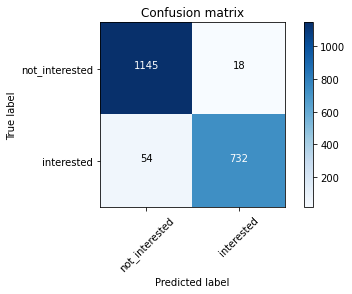

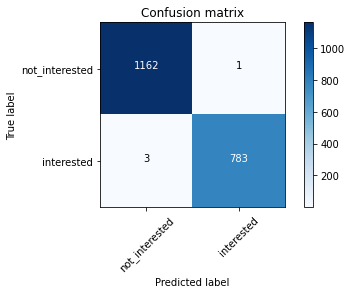

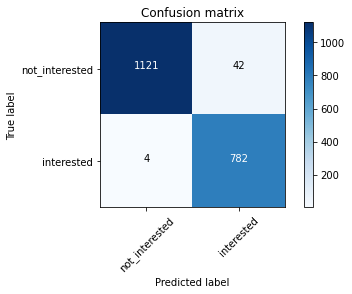

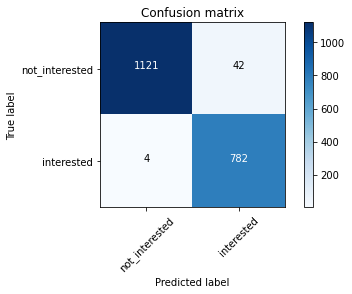

In [ ]:
# Compute confusion matrix
print('The model evaluation of lda')
cnf_matrix = confusion_matrix(y_test, y_test_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_test_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not_interested','interested'],normalize= False,  title='Confusion matrix')
print('_____________________________________________________________________________________________________________')
print('The model evaluation of svm')
cnf_matrix = confusion_matrix(y_test, y_test_pred_1, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_test_pred_1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not_interested','interested'],normalize= False,  title='Confusion matrix')
print('_____________________________________________________________________________________________________________')
print('The model evaluation of KNN')
cnf_matrix = confusion_matrix(y_test, y_test_pred_2, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_test_pred_2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not_interested','interested'],normalize= False,  title='Confusion matrix')
print('_____________________________________________________________________________________________________________')
print('The model evaluation of RF')
cnf_matrix = confusion_matrix(y_test, y_test_pred_3, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_test_pred_3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['not_interested','interested'],normalize= False,  title='Confusion matrix')
print('_____________________________________________________________________________________________________________')

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lda, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('___________________________________________________________')
accuracies_1 = cross_val_score(estimator = svmc, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_1.std()*100))
print('___________________________________________________________')
accuracies_2 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_2.std()*100))
print('___________________________________________________________')
accuracies_3 = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_3.std()*100))
print('___________________________________________________________')


Accuracy: 95.89 %
Standard Deviation: 0.52 %
___________________________________________________________
Accuracy: 99.69 %
Standard Deviation: 0.14 %
___________________________________________________________
Accuracy: 97.09 %
Standard Deviation: 0.53 %
___________________________________________________________
Accuracy: 99.70 %
Standard Deviation: 0.14 %
___________________________________________________________
